In [1]:
from jupyterthemes import jtplot
from tensorflow import set_random_seed
set_random_seed(42)
jtplot.style()
# Constantes
SEED = 42
m = 64
tau = 1
delta = 2

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt
from tensorflow.keras import layers
from keras import regularizers
from tensorflow import keras
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [3]:
from Funciones import GenersConjuntos
from Funciones import plot_history

In [4]:
def ModMLP(show=True): # Modelo de la red neuronal a utilizar
    inputs = keras.Input(shape=(m))
    x = layers.Dense(64, activation='sigmoid')(inputs)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(256, activation='relu')(x)
    outputs = layers.Dense(delta, activation='linear')(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name='forecasting')
    
    if(show):
        model.summary()
    
    return model

<h3> Lectura y analisis de la serie de tiempo </h3>

Para comenzar se lee la serie de tiempo desde el archivo csv

In [5]:
TS = pd.read_csv('TimesSeries\Electric_Production.csv')

In [6]:
TS.info() # Se reviza que la serie de tiempo no tenga nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
DATE     397 non-null object
Value    397 non-null float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


La serie de tiempo es tomada desde la columna value

In [7]:
serie = TS.Value

Se pueden revizar su media, su maximo, su minimo, y su promedio

In [8]:
print('Media:', serie.mean())
print('Maximo:', serie.max())
print('Minimo:', serie.min())
print('STD:', serie.std())

Media: 88.84721763224182
Maximo: 129.4048
Minimo: 55.3151
STD: 15.387833664730902


La serie es convertiza a numpy array para un mejor manejo, a su vez es ploteada para observar su forma

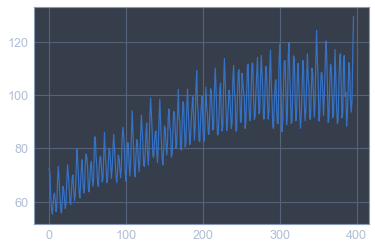

In [9]:
serie = np.array(serie)
plt.plot(serie)
plt.show()

Posteriormente se estandariza la serie y se obtienen los conjuntos de datos con los cuales se ha de entrenar la red

In [10]:
X_train, X_val, X_test, y_train, y_val, y_test=  GenersConjuntos(serie, 0.3, 0.2)

In [11]:
X_val.shape

(47, 64)

<h3> Diseño y entrenamiento de la red neuronal </h3>

In [12]:
model = ModMLP()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "forecasting"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 514       
Total params: 46,018
Trainable params: 46,018
Non-trainable params: 0
_________________________________________________________________


Una vez que el modelo esta creado se compila y se entrena.

En la compilación se utiliza como funcion de perdida el Error cuadratico medio en convinacion con el gradiente estocastico, el tercer parametro son las metricas en este caso se utilizan el error absoluto medio, el error cuadratico medio y accuracy, aunque la ultima no es una buena referencia cuando se realiza prediccion de series de tiempo (forcasting) es más comun su utilización en clasificación.

In [13]:
model.compile(loss="mean_squared_error", optimizer="sgd", metrics=['mae', 'mse','accuracy'])

In [14]:
#callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=2000,
                    validation_data=(X_val, y_val))

test_scores = model.evaluate(X_test, y_test, batch_size=32)
print('Test loss:', test_scores[0])
print('Test mae:', test_scores[1])
print('Test mse:', test_scores[2])
print('Test acc:', test_scores[3])

Train on 185 samples, validate on 47 samples
Epoch 1/2000
185/185 [==============================] - 0s 2ms/sample - loss: 0.7962 - mean_absolute_error: 0.7183 - mean_squared_error: 0.7962 - acc: 0.4811 - val_loss: 0.5495 - val_mean_absolute_error: 0.6099 - val_mean_squared_error: 0.5495 - val_acc: 0.5106
Epoch 2/2000
185/185 [==============================] - 0s 119us/sample - loss: 0.6251 - mean_absolute_error: 0.6308 - mean_squared_error: 0.6251 - acc: 0.5189 - val_loss: 0.4483 - val_mean_absolute_error: 0.5501 - val_mean_squared_error: 0.4483 - val_acc: 0.5106
Epoch 3/2000
185/185 [==============================] - 0s 119us/sample - loss: 0.5341 - mean_absolute_error: 0.5937 - mean_squared_error: 0.5341 - acc: 0.4757 - val_loss: 0.3898 - val_mean_absolute_error: 0.5104 - val_mean_squared_error: 0.3898 - val_acc: 0.5957
Epoch 4/2000
185/185 [==============================] - 0s 129us/sample - loss: 0.4735 - mean_absolute_error: 0.5628 - mean_squared_error: 0.4735 - acc: 0.4973 - val

Epoch 32/2000
185/185 [==============================] - 0s 135us/sample - loss: 0.1184 - mean_absolute_error: 0.2790 - mean_squared_error: 0.1184 - acc: 0.8811 - val_loss: 0.0793 - val_mean_absolute_error: 0.2318 - val_mean_squared_error: 0.0793 - val_acc: 0.8936
Epoch 33/2000
185/185 [==============================] - 0s 151us/sample - loss: 0.1146 - mean_absolute_error: 0.2747 - mean_squared_error: 0.1146 - acc: 0.8811 - val_loss: 0.0769 - val_mean_absolute_error: 0.2278 - val_mean_squared_error: 0.0769 - val_acc: 0.8936
Epoch 34/2000
185/185 [==============================] - 0s 147us/sample - loss: 0.1115 - mean_absolute_error: 0.2700 - mean_squared_error: 0.1115 - acc: 0.8811 - val_loss: 0.0747 - val_mean_absolute_error: 0.2235 - val_mean_squared_error: 0.0747 - val_acc: 0.9149
Epoch 35/2000
185/185 [==============================] - 0s 168us/sample - loss: 0.1084 - mean_absolute_error: 0.2665 - mean_squared_error: 0.1084 - acc: 0.8757 - val_loss: 0.0728 - val_mean_absolute_error

Epoch 63/2000
185/185 [==============================] - 0s 112us/sample - loss: 0.0659 - mean_absolute_error: 0.2002 - mean_squared_error: 0.0659 - acc: 0.9081 - val_loss: 0.0475 - val_mean_absolute_error: 0.1773 - val_mean_squared_error: 0.0475 - val_acc: 0.9149
Epoch 64/2000
185/185 [==============================] - 0s 108us/sample - loss: 0.0652 - mean_absolute_error: 0.2004 - mean_squared_error: 0.0652 - acc: 0.9081 - val_loss: 0.0472 - val_mean_absolute_error: 0.1770 - val_mean_squared_error: 0.0472 - val_acc: 0.9149
Epoch 65/2000
185/185 [==============================] - 0s 129us/sample - loss: 0.0642 - mean_absolute_error: 0.1993 - mean_squared_error: 0.0642 - acc: 0.9081 - val_loss: 0.0469 - val_mean_absolute_error: 0.1743 - val_mean_squared_error: 0.0469 - val_acc: 0.9149
Epoch 66/2000
185/185 [==============================] - 0s 113us/sample - loss: 0.0638 - mean_absolute_error: 0.1973 - mean_squared_error: 0.0638 - acc: 0.9081 - val_loss: 0.0467 - val_mean_absolute_error

Epoch 94/2000
185/185 [==============================] - 0s 140us/sample - loss: 0.0540 - mean_absolute_error: 0.1809 - mean_squared_error: 0.0540 - acc: 0.9081 - val_loss: 0.0418 - val_mean_absolute_error: 0.1627 - val_mean_squared_error: 0.0418 - val_acc: 0.9149
Epoch 95/2000
185/185 [==============================] - 0s 137us/sample - loss: 0.0536 - mean_absolute_error: 0.1803 - mean_squared_error: 0.0536 - acc: 0.9081 - val_loss: 0.0417 - val_mean_absolute_error: 0.1625 - val_mean_squared_error: 0.0417 - val_acc: 0.9149
Epoch 96/2000
185/185 [==============================] - 0s 142us/sample - loss: 0.0535 - mean_absolute_error: 0.1793 - mean_squared_error: 0.0535 - acc: 0.9081 - val_loss: 0.0416 - val_mean_absolute_error: 0.1643 - val_mean_squared_error: 0.0416 - val_acc: 0.9149
Epoch 97/2000
185/185 [==============================] - 0s 131us/sample - loss: 0.0535 - mean_absolute_error: 0.1805 - mean_squared_error: 0.0535 - acc: 0.9081 - val_loss: 0.0413 - val_mean_absolute_error

Epoch 125/2000
185/185 [==============================] - 0s 107us/sample - loss: 0.0491 - mean_absolute_error: 0.1727 - mean_squared_error: 0.0491 - acc: 0.9081 - val_loss: 0.0390 - val_mean_absolute_error: 0.1556 - val_mean_squared_error: 0.0390 - val_acc: 0.9149
Epoch 126/2000
185/185 [==============================] - 0s 106us/sample - loss: 0.0492 - mean_absolute_error: 0.1723 - mean_squared_error: 0.0492 - acc: 0.9081 - val_loss: 0.0387 - val_mean_absolute_error: 0.1556 - val_mean_squared_error: 0.0387 - val_acc: 0.9149
Epoch 127/2000
185/185 [==============================] - 0s 95us/sample - loss: 0.0490 - mean_absolute_error: 0.1725 - mean_squared_error: 0.0490 - acc: 0.9081 - val_loss: 0.0388 - val_mean_absolute_error: 0.1552 - val_mean_squared_error: 0.0388 - val_acc: 0.9149
Epoch 128/2000
185/185 [==============================] - 0s 87us/sample - loss: 0.0491 - mean_absolute_error: 0.1728 - mean_squared_error: 0.0491 - acc: 0.9081 - val_loss: 0.0386 - val_mean_absolute_err

Epoch 156/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0468 - mean_absolute_error: 0.1687 - mean_squared_error: 0.0468 - acc: 0.9081 - val_loss: 0.0377 - val_mean_absolute_error: 0.1523 - val_mean_squared_error: 0.0377 - val_acc: 0.9149
Epoch 157/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0468 - mean_absolute_error: 0.1677 - mean_squared_error: 0.0468 - acc: 0.9081 - val_loss: 0.0373 - val_mean_absolute_error: 0.1522 - val_mean_squared_error: 0.0373 - val_acc: 0.9149
Epoch 158/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0472 - mean_absolute_error: 0.1687 - mean_squared_error: 0.0472 - acc: 0.9081 - val_loss: 0.0377 - val_mean_absolute_error: 0.1538 - val_mean_squared_error: 0.0377 - val_acc: 0.9149
Epoch 159/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0466 - mean_absolute_error: 0.1689 - mean_squared_error: 0.0466 - acc: 0.9081 - val_loss: 0.0375 - val_mean_absolute_err

Epoch 187/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0450 - mean_absolute_error: 0.1657 - mean_squared_error: 0.0450 - acc: 0.9081 - val_loss: 0.0363 - val_mean_absolute_error: 0.1492 - val_mean_squared_error: 0.0363 - val_acc: 0.9149
Epoch 188/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0451 - mean_absolute_error: 0.1645 - mean_squared_error: 0.0451 - acc: 0.9081 - val_loss: 0.0367 - val_mean_absolute_error: 0.1505 - val_mean_squared_error: 0.0367 - val_acc: 0.9149
Epoch 189/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0450 - mean_absolute_error: 0.1653 - mean_squared_error: 0.0450 - acc: 0.9081 - val_loss: 0.0362 - val_mean_absolute_error: 0.1489 - val_mean_squared_error: 0.0362 - val_acc: 0.9149
Epoch 190/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0447 - mean_absolute_error: 0.1646 - mean_squared_error: 0.0447 - acc: 0.9081 - val_loss: 0.0359 - val_mean_absolute_error

Epoch 218/2000
185/185 [==============================] - 0s 108us/sample - loss: 0.0435 - mean_absolute_error: 0.1614 - mean_squared_error: 0.0435 - acc: 0.9081 - val_loss: 0.0354 - val_mean_absolute_error: 0.1477 - val_mean_squared_error: 0.0354 - val_acc: 0.9149
Epoch 219/2000
185/185 [==============================] - 0s 87us/sample - loss: 0.0435 - mean_absolute_error: 0.1610 - mean_squared_error: 0.0435 - acc: 0.9081 - val_loss: 0.0356 - val_mean_absolute_error: 0.1487 - val_mean_squared_error: 0.0356 - val_acc: 0.9149
Epoch 220/2000
185/185 [==============================] - 0s 114us/sample - loss: 0.0437 - mean_absolute_error: 0.1613 - mean_squared_error: 0.0437 - acc: 0.9081 - val_loss: 0.0352 - val_mean_absolute_error: 0.1484 - val_mean_squared_error: 0.0352 - val_acc: 0.9149
Epoch 221/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0434 - mean_absolute_error: 0.1614 - mean_squared_error: 0.0434 - acc: 0.9081 - val_loss: 0.0353 - val_mean_absolute_er

Epoch 249/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0423 - mean_absolute_error: 0.1590 - mean_squared_error: 0.0423 - acc: 0.9081 - val_loss: 0.0345 - val_mean_absolute_error: 0.1453 - val_mean_squared_error: 0.0345 - val_acc: 0.9149
Epoch 250/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0426 - mean_absolute_error: 0.1587 - mean_squared_error: 0.0426 - acc: 0.9081 - val_loss: 0.0343 - val_mean_absolute_error: 0.1454 - val_mean_squared_error: 0.0343 - val_acc: 0.9149
Epoch 251/2000
185/185 [==============================] - 0s 108us/sample - loss: 0.0423 - mean_absolute_error: 0.1580 - mean_squared_error: 0.0423 - acc: 0.9081 - val_loss: 0.0342 - val_mean_absolute_error: 0.1458 - val_mean_squared_error: 0.0342 - val_acc: 0.9149
Epoch 252/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0426 - mean_absolute_error: 0.1584 - mean_squared_error: 0.0426 - acc: 0.9135 - val_loss: 0.0348 - val_mean_absolute_erro

Epoch 280/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0414 - mean_absolute_error: 0.1558 - mean_squared_error: 0.0414 - acc: 0.9081 - val_loss: 0.0338 - val_mean_absolute_error: 0.1448 - val_mean_squared_error: 0.0338 - val_acc: 0.9149
Epoch 281/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0418 - mean_absolute_error: 0.1564 - mean_squared_error: 0.0418 - acc: 0.9081 - val_loss: 0.0336 - val_mean_absolute_error: 0.1445 - val_mean_squared_error: 0.0336 - val_acc: 0.9149
Epoch 282/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0415 - mean_absolute_error: 0.1564 - mean_squared_error: 0.0415 - acc: 0.9081 - val_loss: 0.0336 - val_mean_absolute_error: 0.1445 - val_mean_squared_error: 0.0336 - val_acc: 0.9149
Epoch 283/2000
185/185 [==============================] - 0s 99us/sample - loss: 0.0411 - mean_absolute_error: 0.1554 - mean_squared_error: 0.0411 - acc: 0.9081 - val_loss: 0.0337 - val_mean_absolute_error

Epoch 311/2000
185/185 [==============================] - 0s 113us/sample - loss: 0.0407 - mean_absolute_error: 0.1539 - mean_squared_error: 0.0407 - acc: 0.9081 - val_loss: 0.0331 - val_mean_absolute_error: 0.1433 - val_mean_squared_error: 0.0331 - val_acc: 0.9149
Epoch 312/2000
185/185 [==============================] - 0s 108us/sample - loss: 0.0407 - mean_absolute_error: 0.1540 - mean_squared_error: 0.0407 - acc: 0.9081 - val_loss: 0.0332 - val_mean_absolute_error: 0.1434 - val_mean_squared_error: 0.0332 - val_acc: 0.9149
Epoch 313/2000
185/185 [==============================] - 0s 113us/sample - loss: 0.0405 - mean_absolute_error: 0.1537 - mean_squared_error: 0.0405 - acc: 0.9081 - val_loss: 0.0333 - val_mean_absolute_error: 0.1439 - val_mean_squared_error: 0.0333 - val_acc: 0.9149
Epoch 314/2000
185/185 [==============================] - 0s 91us/sample - loss: 0.0405 - mean_absolute_error: 0.1541 - mean_squared_error: 0.0405 - acc: 0.9081 - val_loss: 0.0333 - val_mean_absolute_er

Epoch 342/2000
185/185 [==============================] - 0s 119us/sample - loss: 0.0396 - mean_absolute_error: 0.1516 - mean_squared_error: 0.0396 - acc: 0.9081 - val_loss: 0.0327 - val_mean_absolute_error: 0.1422 - val_mean_squared_error: 0.0327 - val_acc: 0.9149
Epoch 343/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0398 - mean_absolute_error: 0.1520 - mean_squared_error: 0.0398 - acc: 0.9081 - val_loss: 0.0326 - val_mean_absolute_error: 0.1426 - val_mean_squared_error: 0.0326 - val_acc: 0.9149
Epoch 344/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0402 - mean_absolute_error: 0.1525 - mean_squared_error: 0.0402 - acc: 0.9081 - val_loss: 0.0328 - val_mean_absolute_error: 0.1436 - val_mean_squared_error: 0.0328 - val_acc: 0.9149
Epoch 345/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0398 - mean_absolute_error: 0.1524 - mean_squared_error: 0.0398 - acc: 0.9135 - val_loss: 0.0328 - val_mean_absolute_err

185/185 [==============================] - 0s 119us/sample - loss: 0.0390 - mean_absolute_error: 0.1501 - mean_squared_error: 0.0390 - acc: 0.9027 - val_loss: 0.0322 - val_mean_absolute_error: 0.1414 - val_mean_squared_error: 0.0322 - val_acc: 0.9149
Epoch 373/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0394 - mean_absolute_error: 0.1502 - mean_squared_error: 0.0394 - acc: 0.9081 - val_loss: 0.0323 - val_mean_absolute_error: 0.1419 - val_mean_squared_error: 0.0323 - val_acc: 0.9149
Epoch 374/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0393 - mean_absolute_error: 0.1506 - mean_squared_error: 0.0393 - acc: 0.9081 - val_loss: 0.0326 - val_mean_absolute_error: 0.1427 - val_mean_squared_error: 0.0326 - val_acc: 0.9149
Epoch 375/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0390 - mean_absolute_error: 0.1499 - mean_squared_error: 0.0390 - acc: 0.9081 - val_loss: 0.0324 - val_mean_absolute_error: 0.1414 - val

Epoch 403/2000
185/185 [==============================] - 0s 94us/sample - loss: 0.0384 - mean_absolute_error: 0.1483 - mean_squared_error: 0.0384 - acc: 0.9081 - val_loss: 0.0318 - val_mean_absolute_error: 0.1404 - val_mean_squared_error: 0.0318 - val_acc: 0.8936
Epoch 404/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0390 - mean_absolute_error: 0.1505 - mean_squared_error: 0.0390 - acc: 0.9081 - val_loss: 0.0319 - val_mean_absolute_error: 0.1411 - val_mean_squared_error: 0.0319 - val_acc: 0.9149
Epoch 405/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0387 - mean_absolute_error: 0.1493 - mean_squared_error: 0.0387 - acc: 0.9081 - val_loss: 0.0320 - val_mean_absolute_error: 0.1404 - val_mean_squared_error: 0.0320 - val_acc: 0.9149
Epoch 406/2000
185/185 [==============================] - 0s 86us/sample - loss: 0.0387 - mean_absolute_error: 0.1486 - mean_squared_error: 0.0387 - acc: 0.9081 - val_loss: 0.0319 - val_mean_absolute_erro

185/185 [==============================] - 0s 102us/sample - loss: 0.0379 - mean_absolute_error: 0.1474 - mean_squared_error: 0.0379 - acc: 0.9081 - val_loss: 0.0317 - val_mean_absolute_error: 0.1398 - val_mean_squared_error: 0.0317 - val_acc: 0.9149
Epoch 434/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0377 - mean_absolute_error: 0.1467 - mean_squared_error: 0.0377 - acc: 0.9081 - val_loss: 0.0316 - val_mean_absolute_error: 0.1402 - val_mean_squared_error: 0.0316 - val_acc: 0.9149
Epoch 435/2000
185/185 [==============================] - 0s 140us/sample - loss: 0.0378 - mean_absolute_error: 0.1466 - mean_squared_error: 0.0378 - acc: 0.9081 - val_loss: 0.0316 - val_mean_absolute_error: 0.1397 - val_mean_squared_error: 0.0316 - val_acc: 0.8936
Epoch 436/2000
185/185 [==============================] - 0s 86us/sample - loss: 0.0379 - mean_absolute_error: 0.1474 - mean_squared_error: 0.0379 - acc: 0.9081 - val_loss: 0.0318 - val_mean_absolute_error: 0.1397 - va

Epoch 464/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0374 - mean_absolute_error: 0.1459 - mean_squared_error: 0.0374 - acc: 0.9081 - val_loss: 0.0313 - val_mean_absolute_error: 0.1395 - val_mean_squared_error: 0.0313 - val_acc: 0.8936
Epoch 465/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0377 - mean_absolute_error: 0.1468 - mean_squared_error: 0.0377 - acc: 0.9081 - val_loss: 0.0315 - val_mean_absolute_error: 0.1400 - val_mean_squared_error: 0.0315 - val_acc: 0.9149
Epoch 466/2000
185/185 [==============================] - 0s 108us/sample - loss: 0.0373 - mean_absolute_error: 0.1457 - mean_squared_error: 0.0373 - acc: 0.9027 - val_loss: 0.0313 - val_mean_absolute_error: 0.1390 - val_mean_squared_error: 0.0313 - val_acc: 0.8936
Epoch 467/2000
185/185 [==============================] - 0s 108us/sample - loss: 0.0376 - mean_absolute_error: 0.1469 - mean_squared_error: 0.0376 - acc: 0.9081 - val_loss: 0.0313 - val_mean_absolute_er

Epoch 495/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0367 - mean_absolute_error: 0.1446 - mean_squared_error: 0.0367 - acc: 0.9081 - val_loss: 0.0310 - val_mean_absolute_error: 0.1386 - val_mean_squared_error: 0.0310 - val_acc: 0.8936
Epoch 496/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0369 - mean_absolute_error: 0.1450 - mean_squared_error: 0.0369 - acc: 0.9081 - val_loss: 0.0311 - val_mean_absolute_error: 0.1385 - val_mean_squared_error: 0.0311 - val_acc: 0.8936
Epoch 497/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0370 - mean_absolute_error: 0.1455 - mean_squared_error: 0.0370 - acc: 0.9081 - val_loss: 0.0312 - val_mean_absolute_error: 0.1384 - val_mean_squared_error: 0.0312 - val_acc: 0.8936
Epoch 498/2000
185/185 [==============================] - ETA: 0s - loss: 0.0323 - mean_absolute_error: 0.1352 - mean_squared_error: 0.0323 - acc: 0.96 - 0s 97us/sample - loss: 0.0373 - mean_absolute_erro

185/185 [==============================] - 0s 112us/sample - loss: 0.0365 - mean_absolute_error: 0.1442 - mean_squared_error: 0.0365 - acc: 0.9081 - val_loss: 0.0309 - val_mean_absolute_error: 0.1389 - val_mean_squared_error: 0.0309 - val_acc: 0.8936
Epoch 526/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0363 - mean_absolute_error: 0.1438 - mean_squared_error: 0.0363 - acc: 0.9081 - val_loss: 0.0308 - val_mean_absolute_error: 0.1380 - val_mean_squared_error: 0.0308 - val_acc: 0.8936
Epoch 527/2000
185/185 [==============================] - 0s 76us/sample - loss: 0.0363 - mean_absolute_error: 0.1439 - mean_squared_error: 0.0363 - acc: 0.9081 - val_loss: 0.0308 - val_mean_absolute_error: 0.1379 - val_mean_squared_error: 0.0308 - val_acc: 0.8936
Epoch 528/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0363 - mean_absolute_error: 0.1436 - mean_squared_error: 0.0363 - acc: 0.9081 - val_loss: 0.0307 - val_mean_absolute_error: 0.1386 - val

Epoch 556/2000
185/185 [==============================] - 0s 100us/sample - loss: 0.0360 - mean_absolute_error: 0.1433 - mean_squared_error: 0.0360 - acc: 0.9081 - val_loss: 0.0305 - val_mean_absolute_error: 0.1379 - val_mean_squared_error: 0.0305 - val_acc: 0.8936
Epoch 557/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0360 - mean_absolute_error: 0.1429 - mean_squared_error: 0.0360 - acc: 0.9081 - val_loss: 0.0305 - val_mean_absolute_error: 0.1380 - val_mean_squared_error: 0.0305 - val_acc: 0.8936
Epoch 558/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0358 - mean_absolute_error: 0.1429 - mean_squared_error: 0.0358 - acc: 0.9081 - val_loss: 0.0307 - val_mean_absolute_error: 0.1375 - val_mean_squared_error: 0.0307 - val_acc: 0.8936
Epoch 559/2000
185/185 [==============================] - 0s 124us/sample - loss: 0.0361 - mean_absolute_error: 0.1430 - mean_squared_error: 0.0361 - acc: 0.9081 - val_loss: 0.0306 - val_mean_absolute_er

185/185 [==============================] - 0s 110us/sample - loss: 0.0356 - mean_absolute_error: 0.1421 - mean_squared_error: 0.0356 - acc: 0.9081 - val_loss: 0.0306 - val_mean_absolute_error: 0.1371 - val_mean_squared_error: 0.0306 - val_acc: 0.8936
Epoch 587/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0359 - mean_absolute_error: 0.1439 - mean_squared_error: 0.0359 - acc: 0.9081 - val_loss: 0.0309 - val_mean_absolute_error: 0.1372 - val_mean_squared_error: 0.0309 - val_acc: 0.8936
Epoch 588/2000
185/185 [==============================] - 0s 135us/sample - loss: 0.0356 - mean_absolute_error: 0.1427 - mean_squared_error: 0.0356 - acc: 0.9027 - val_loss: 0.0303 - val_mean_absolute_error: 0.1372 - val_mean_squared_error: 0.0303 - val_acc: 0.8936
Epoch 589/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0354 - mean_absolute_error: 0.1420 - mean_squared_error: 0.0354 - acc: 0.9081 - val_loss: 0.0304 - val_mean_absolute_error: 0.1373 - v

Epoch 617/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0351 - mean_absolute_error: 0.1410 - mean_squared_error: 0.0351 - acc: 0.9081 - val_loss: 0.0302 - val_mean_absolute_error: 0.1368 - val_mean_squared_error: 0.0302 - val_acc: 0.8936
Epoch 618/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0354 - mean_absolute_error: 0.1425 - mean_squared_error: 0.0354 - acc: 0.9081 - val_loss: 0.0303 - val_mean_absolute_error: 0.1374 - val_mean_squared_error: 0.0303 - val_acc: 0.8936
Epoch 619/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0353 - mean_absolute_error: 0.1416 - mean_squared_error: 0.0353 - acc: 0.9081 - val_loss: 0.0304 - val_mean_absolute_error: 0.1379 - val_mean_squared_error: 0.0304 - val_acc: 0.8936
Epoch 620/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0351 - mean_absolute_error: 0.1411 - mean_squared_error: 0.0351 - acc: 0.9081 - val_loss: 0.0302 - val_mean_absolute_error

Epoch 648/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0350 - mean_absolute_error: 0.1407 - mean_squared_error: 0.0350 - acc: 0.9081 - val_loss: 0.0300 - val_mean_absolute_error: 0.1364 - val_mean_squared_error: 0.0300 - val_acc: 0.8723
Epoch 649/2000
185/185 [==============================] - 0s 81us/sample - loss: 0.0352 - mean_absolute_error: 0.1413 - mean_squared_error: 0.0352 - acc: 0.9081 - val_loss: 0.0299 - val_mean_absolute_error: 0.1364 - val_mean_squared_error: 0.0299 - val_acc: 0.8723
Epoch 650/2000
185/185 [==============================] - 0s 91us/sample - loss: 0.0347 - mean_absolute_error: 0.1405 - mean_squared_error: 0.0347 - acc: 0.9081 - val_loss: 0.0300 - val_mean_absolute_error: 0.1366 - val_mean_squared_error: 0.0300 - val_acc: 0.8723
Epoch 651/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0345 - mean_absolute_error: 0.1401 - mean_squared_error: 0.0345 - acc: 0.9081 - val_loss: 0.0301 - val_mean_absolute_erro

Epoch 679/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0341 - mean_absolute_error: 0.1392 - mean_squared_error: 0.0341 - acc: 0.9081 - val_loss: 0.0299 - val_mean_absolute_error: 0.1362 - val_mean_squared_error: 0.0299 - val_acc: 0.8723
Epoch 680/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0344 - mean_absolute_error: 0.1398 - mean_squared_error: 0.0344 - acc: 0.9081 - val_loss: 0.0299 - val_mean_absolute_error: 0.1363 - val_mean_squared_error: 0.0299 - val_acc: 0.8723
Epoch 681/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0342 - mean_absolute_error: 0.1393 - mean_squared_error: 0.0342 - acc: 0.9081 - val_loss: 0.0299 - val_mean_absolute_error: 0.1372 - val_mean_squared_error: 0.0299 - val_acc: 0.8723
Epoch 682/2000
185/185 [==============================] - 0s 94us/sample - loss: 0.0342 - mean_absolute_error: 0.1397 - mean_squared_error: 0.0342 - acc: 0.9027 - val_loss: 0.0299 - val_mean_absolute_error

185/185 [==============================] - 0s 92us/sample - loss: 0.0339 - mean_absolute_error: 0.1390 - mean_squared_error: 0.0339 - acc: 0.9081 - val_loss: 0.0300 - val_mean_absolute_error: 0.1361 - val_mean_squared_error: 0.0300 - val_acc: 0.8723
Epoch 710/2000
185/185 [==============================] - 0s 94us/sample - loss: 0.0340 - mean_absolute_error: 0.1398 - mean_squared_error: 0.0340 - acc: 0.9081 - val_loss: 0.0300 - val_mean_absolute_error: 0.1360 - val_mean_squared_error: 0.0300 - val_acc: 0.8723
Epoch 711/2000
185/185 [==============================] - 0s 86us/sample - loss: 0.0337 - mean_absolute_error: 0.1387 - mean_squared_error: 0.0337 - acc: 0.9081 - val_loss: 0.0298 - val_mean_absolute_error: 0.1371 - val_mean_squared_error: 0.0298 - val_acc: 0.8936
Epoch 712/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0338 - mean_absolute_error: 0.1388 - mean_squared_error: 0.0338 - acc: 0.9081 - val_loss: 0.0298 - val_mean_absolute_error: 0.1362 - val

Epoch 740/2000
185/185 [==============================] - 0s 140us/sample - loss: 0.0334 - mean_absolute_error: 0.1379 - mean_squared_error: 0.0334 - acc: 0.9027 - val_loss: 0.0299 - val_mean_absolute_error: 0.1367 - val_mean_squared_error: 0.0299 - val_acc: 0.8723
Epoch 741/2000
185/185 [==============================] - 0s 108us/sample - loss: 0.0335 - mean_absolute_error: 0.1382 - mean_squared_error: 0.0335 - acc: 0.9081 - val_loss: 0.0299 - val_mean_absolute_error: 0.1367 - val_mean_squared_error: 0.0299 - val_acc: 0.8723
Epoch 742/2000
185/185 [==============================] - 0s 106us/sample - loss: 0.0334 - mean_absolute_error: 0.1380 - mean_squared_error: 0.0334 - acc: 0.9027 - val_loss: 0.0300 - val_mean_absolute_error: 0.1360 - val_mean_squared_error: 0.0300 - val_acc: 0.8936
Epoch 743/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0335 - mean_absolute_error: 0.1382 - mean_squared_error: 0.0335 - acc: 0.9027 - val_loss: 0.0299 - val_mean_absolute_e

Epoch 771/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0337 - mean_absolute_error: 0.1401 - mean_squared_error: 0.0337 - acc: 0.9027 - val_loss: 0.0301 - val_mean_absolute_error: 0.1359 - val_mean_squared_error: 0.0301 - val_acc: 0.8936
Epoch 772/2000
185/185 [==============================] - 0s 108us/sample - loss: 0.0331 - mean_absolute_error: 0.1378 - mean_squared_error: 0.0331 - acc: 0.9027 - val_loss: 0.0299 - val_mean_absolute_error: 0.1375 - val_mean_squared_error: 0.0299 - val_acc: 0.8723
Epoch 773/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0331 - mean_absolute_error: 0.1381 - mean_squared_error: 0.0331 - acc: 0.9027 - val_loss: 0.0298 - val_mean_absolute_error: 0.1366 - val_mean_squared_error: 0.0298 - val_acc: 0.8723
Epoch 774/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0331 - mean_absolute_error: 0.1375 - mean_squared_error: 0.0331 - acc: 0.9027 - val_loss: 0.0300 - val_mean_absolute_erro

185/185 [==============================] - 0s 97us/sample - loss: 0.0326 - mean_absolute_error: 0.1365 - mean_squared_error: 0.0326 - acc: 0.9027 - val_loss: 0.0297 - val_mean_absolute_error: 0.1367 - val_mean_squared_error: 0.0297 - val_acc: 0.8936
Epoch 802/2000
185/185 [==============================] - 0s 94us/sample - loss: 0.0327 - mean_absolute_error: 0.1368 - mean_squared_error: 0.0327 - acc: 0.9027 - val_loss: 0.0298 - val_mean_absolute_error: 0.1361 - val_mean_squared_error: 0.0298 - val_acc: 0.8936
Epoch 803/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0327 - mean_absolute_error: 0.1366 - mean_squared_error: 0.0327 - acc: 0.9027 - val_loss: 0.0298 - val_mean_absolute_error: 0.1362 - val_mean_squared_error: 0.0298 - val_acc: 0.8723
Epoch 804/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0327 - mean_absolute_error: 0.1367 - mean_squared_error: 0.0327 - acc: 0.9027 - val_loss: 0.0298 - val_mean_absolute_error: 0.1377 - val

Epoch 832/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0323 - mean_absolute_error: 0.1360 - mean_squared_error: 0.0323 - acc: 0.9027 - val_loss: 0.0297 - val_mean_absolute_error: 0.1363 - val_mean_squared_error: 0.0297 - val_acc: 0.8936
Epoch 833/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0322 - mean_absolute_error: 0.1358 - mean_squared_error: 0.0322 - acc: 0.9027 - val_loss: 0.0297 - val_mean_absolute_error: 0.1373 - val_mean_squared_error: 0.0297 - val_acc: 0.8936
Epoch 834/2000
185/185 [==============================] - 0s 86us/sample - loss: 0.0323 - mean_absolute_error: 0.1364 - mean_squared_error: 0.0323 - acc: 0.9027 - val_loss: 0.0298 - val_mean_absolute_error: 0.1373 - val_mean_squared_error: 0.0298 - val_acc: 0.8936
Epoch 835/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0324 - mean_absolute_error: 0.1363 - mean_squared_error: 0.0324 - acc: 0.9027 - val_loss: 0.0298 - val_mean_absolute_erro

185/185 [==============================] - 0s 108us/sample - loss: 0.0322 - mean_absolute_error: 0.1358 - mean_squared_error: 0.0322 - acc: 0.9027 - val_loss: 0.0301 - val_mean_absolute_error: 0.1392 - val_mean_squared_error: 0.0301 - val_acc: 0.8936
Epoch 863/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0320 - mean_absolute_error: 0.1353 - mean_squared_error: 0.0320 - acc: 0.9027 - val_loss: 0.0298 - val_mean_absolute_error: 0.1358 - val_mean_squared_error: 0.0298 - val_acc: 0.8936
Epoch 864/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0320 - mean_absolute_error: 0.1353 - mean_squared_error: 0.0320 - acc: 0.9027 - val_loss: 0.0296 - val_mean_absolute_error: 0.1369 - val_mean_squared_error: 0.0296 - val_acc: 0.8936
Epoch 865/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0319 - mean_absolute_error: 0.1351 - mean_squared_error: 0.0319 - acc: 0.9081 - val_loss: 0.0297 - val_mean_absolute_error: 0.1374 - va

Epoch 893/2000
185/185 [==============================] - 0s 124us/sample - loss: 0.0316 - mean_absolute_error: 0.1346 - mean_squared_error: 0.0316 - acc: 0.9081 - val_loss: 0.0298 - val_mean_absolute_error: 0.1358 - val_mean_squared_error: 0.0298 - val_acc: 0.8936
Epoch 894/2000
185/185 [==============================] - 0s 79us/sample - loss: 0.0317 - mean_absolute_error: 0.1350 - mean_squared_error: 0.0317 - acc: 0.9027 - val_loss: 0.0297 - val_mean_absolute_error: 0.1380 - val_mean_squared_error: 0.0297 - val_acc: 0.8936
Epoch 895/2000
185/185 [==============================] - 0s 96us/sample - loss: 0.0320 - mean_absolute_error: 0.1355 - mean_squared_error: 0.0320 - acc: 0.9027 - val_loss: 0.0296 - val_mean_absolute_error: 0.1367 - val_mean_squared_error: 0.0296 - val_acc: 0.8936
Epoch 896/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0318 - mean_absolute_error: 0.1345 - mean_squared_error: 0.0318 - acc: 0.9081 - val_loss: 0.0296 - val_mean_absolute_erro

Epoch 924/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0313 - mean_absolute_error: 0.1340 - mean_squared_error: 0.0313 - acc: 0.9027 - val_loss: 0.0296 - val_mean_absolute_error: 0.1372 - val_mean_squared_error: 0.0296 - val_acc: 0.8936
Epoch 925/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0315 - mean_absolute_error: 0.1341 - mean_squared_error: 0.0315 - acc: 0.9027 - val_loss: 0.0296 - val_mean_absolute_error: 0.1361 - val_mean_squared_error: 0.0296 - val_acc: 0.8936
Epoch 926/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0316 - mean_absolute_error: 0.1347 - mean_squared_error: 0.0316 - acc: 0.9027 - val_loss: 0.0295 - val_mean_absolute_error: 0.1365 - val_mean_squared_error: 0.0295 - val_acc: 0.8936
Epoch 927/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0314 - mean_absolute_error: 0.1341 - mean_squared_error: 0.0314 - acc: 0.9081 - val_loss: 0.0296 - val_mean_absolute_error

Epoch 955/2000
185/185 [==============================] - 0s 270us/sample - loss: 0.0313 - mean_absolute_error: 0.1343 - mean_squared_error: 0.0313 - acc: 0.9027 - val_loss: 0.0298 - val_mean_absolute_error: 0.1385 - val_mean_squared_error: 0.0298 - val_acc: 0.8936
Epoch 956/2000
185/185 [==============================] - 0s 109us/sample - loss: 0.0318 - mean_absolute_error: 0.1350 - mean_squared_error: 0.0318 - acc: 0.9081 - val_loss: 0.0297 - val_mean_absolute_error: 0.1385 - val_mean_squared_error: 0.0297 - val_acc: 0.8936
Epoch 957/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0312 - mean_absolute_error: 0.1336 - mean_squared_error: 0.0312 - acc: 0.9081 - val_loss: 0.0298 - val_mean_absolute_error: 0.1362 - val_mean_squared_error: 0.0298 - val_acc: 0.8936
Epoch 958/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0312 - mean_absolute_error: 0.1333 - mean_squared_error: 0.0312 - acc: 0.9081 - val_loss: 0.0298 - val_mean_absolute_er

Epoch 986/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0307 - mean_absolute_error: 0.1328 - mean_squared_error: 0.0307 - acc: 0.9081 - val_loss: 0.0296 - val_mean_absolute_error: 0.1369 - val_mean_squared_error: 0.0296 - val_acc: 0.8936
Epoch 987/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0309 - mean_absolute_error: 0.1332 - mean_squared_error: 0.0309 - acc: 0.9135 - val_loss: 0.0297 - val_mean_absolute_error: 0.1357 - val_mean_squared_error: 0.0297 - val_acc: 0.8936
Epoch 988/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0311 - mean_absolute_error: 0.1332 - mean_squared_error: 0.0311 - acc: 0.9081 - val_loss: 0.0297 - val_mean_absolute_error: 0.1366 - val_mean_squared_error: 0.0297 - val_acc: 0.8936
Epoch 989/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0309 - mean_absolute_error: 0.1329 - mean_squared_error: 0.0309 - acc: 0.9081 - val_loss: 0.0298 - val_mean_absolute_error

Epoch 1017/2000
185/185 [==============================] - 0s 113us/sample - loss: 0.0310 - mean_absolute_error: 0.1328 - mean_squared_error: 0.0310 - acc: 0.9081 - val_loss: 0.0296 - val_mean_absolute_error: 0.1358 - val_mean_squared_error: 0.0296 - val_acc: 0.8936
Epoch 1018/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0306 - mean_absolute_error: 0.1325 - mean_squared_error: 0.0306 - acc: 0.9135 - val_loss: 0.0298 - val_mean_absolute_error: 0.1388 - val_mean_squared_error: 0.0298 - val_acc: 0.8936
Epoch 1019/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0307 - mean_absolute_error: 0.1326 - mean_squared_error: 0.0307 - acc: 0.9135 - val_loss: 0.0299 - val_mean_absolute_error: 0.1352 - val_mean_squared_error: 0.0299 - val_acc: 0.8936
Epoch 1020/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0310 - mean_absolute_error: 0.1337 - mean_squared_error: 0.0310 - acc: 0.9081 - val_loss: 0.0299 - val_mean_absolute_

Epoch 1048/2000
185/185 [==============================] - 0s 94us/sample - loss: 0.0303 - mean_absolute_error: 0.1317 - mean_squared_error: 0.0303 - acc: 0.9135 - val_loss: 0.0296 - val_mean_absolute_error: 0.1376 - val_mean_squared_error: 0.0296 - val_acc: 0.8936
Epoch 1049/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0306 - mean_absolute_error: 0.1328 - mean_squared_error: 0.0306 - acc: 0.9135 - val_loss: 0.0296 - val_mean_absolute_error: 0.1362 - val_mean_squared_error: 0.0296 - val_acc: 0.8936
Epoch 1050/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0302 - mean_absolute_error: 0.1313 - mean_squared_error: 0.0302 - acc: 0.9189 - val_loss: 0.0296 - val_mean_absolute_error: 0.1379 - val_mean_squared_error: 0.0296 - val_acc: 0.8936
Epoch 1051/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0304 - mean_absolute_error: 0.1322 - mean_squared_error: 0.0304 - acc: 0.9135 - val_loss: 0.0298 - val_mean_absolute_e

Epoch 1079/2000
185/185 [==============================] - 0s 129us/sample - loss: 0.0300 - mean_absolute_error: 0.1310 - mean_squared_error: 0.0300 - acc: 0.9189 - val_loss: 0.0295 - val_mean_absolute_error: 0.1377 - val_mean_squared_error: 0.0295 - val_acc: 0.8723
Epoch 1080/2000
185/185 [==============================] - 0s 140us/sample - loss: 0.0302 - mean_absolute_error: 0.1321 - mean_squared_error: 0.0302 - acc: 0.9135 - val_loss: 0.0295 - val_mean_absolute_error: 0.1364 - val_mean_squared_error: 0.0295 - val_acc: 0.8723
Epoch 1081/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0301 - mean_absolute_error: 0.1315 - mean_squared_error: 0.0301 - acc: 0.9135 - val_loss: 0.0297 - val_mean_absolute_error: 0.1385 - val_mean_squared_error: 0.0297 - val_acc: 0.8936
Epoch 1082/2000
185/185 [==============================] - 0s 108us/sample - loss: 0.0300 - mean_absolute_error: 0.1313 - mean_squared_error: 0.0300 - acc: 0.9135 - val_loss: 0.0296 - val_mean_absolu

Epoch 1110/2000
185/185 [==============================] - 0s 140us/sample - loss: 0.0299 - mean_absolute_error: 0.1312 - mean_squared_error: 0.0299 - acc: 0.9189 - val_loss: 0.0296 - val_mean_absolute_error: 0.1373 - val_mean_squared_error: 0.0296 - val_acc: 0.8936
Epoch 1111/2000
185/185 [==============================] - 0s 116us/sample - loss: 0.0297 - mean_absolute_error: 0.1306 - mean_squared_error: 0.0297 - acc: 0.9243 - val_loss: 0.0297 - val_mean_absolute_error: 0.1380 - val_mean_squared_error: 0.0297 - val_acc: 0.8936
Epoch 1112/2000
185/185 [==============================] - 0s 106us/sample - loss: 0.0298 - mean_absolute_error: 0.1307 - mean_squared_error: 0.0298 - acc: 0.9243 - val_loss: 0.0296 - val_mean_absolute_error: 0.1380 - val_mean_squared_error: 0.0296 - val_acc: 0.8936
Epoch 1113/2000
185/185 [==============================] - 0s 136us/sample - loss: 0.0301 - mean_absolute_error: 0.1313 - mean_squared_error: 0.0301 - acc: 0.9189 - val_loss: 0.0297 - val_mean_absolu

Epoch 1141/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0296 - mean_absolute_error: 0.1305 - mean_squared_error: 0.0296 - acc: 0.9189 - val_loss: 0.0296 - val_mean_absolute_error: 0.1367 - val_mean_squared_error: 0.0296 - val_acc: 0.8723
Epoch 1142/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0297 - mean_absolute_error: 0.1307 - mean_squared_error: 0.0297 - acc: 0.9189 - val_loss: 0.0297 - val_mean_absolute_error: 0.1362 - val_mean_squared_error: 0.0297 - val_acc: 0.8936
Epoch 1143/2000
185/185 [==============================] - 0s 94us/sample - loss: 0.0299 - mean_absolute_error: 0.1311 - mean_squared_error: 0.0299 - acc: 0.9243 - val_loss: 0.0295 - val_mean_absolute_error: 0.1361 - val_mean_squared_error: 0.0295 - val_acc: 0.8936
Epoch 1144/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0298 - mean_absolute_error: 0.1304 - mean_squared_error: 0.0298 - acc: 0.9135 - val_loss: 0.0295 - val_mean_absolute_

Epoch 1172/2000
185/185 [==============================] - 0s 86us/sample - loss: 0.0296 - mean_absolute_error: 0.1305 - mean_squared_error: 0.0296 - acc: 0.9189 - val_loss: 0.0298 - val_mean_absolute_error: 0.1353 - val_mean_squared_error: 0.0298 - val_acc: 0.8723
Epoch 1173/2000
185/185 [==============================] - ETA: 0s - loss: 0.0312 - mean_absolute_error: 0.1398 - mean_squared_error: 0.0312 - acc: 0.93 - 0s 97us/sample - loss: 0.0295 - mean_absolute_error: 0.1301 - mean_squared_error: 0.0295 - acc: 0.9189 - val_loss: 0.0297 - val_mean_absolute_error: 0.1357 - val_mean_squared_error: 0.0297 - val_acc: 0.8723
Epoch 1174/2000
185/185 [==============================] - 0s 113us/sample - loss: 0.0295 - mean_absolute_error: 0.1306 - mean_squared_error: 0.0295 - acc: 0.9297 - val_loss: 0.0296 - val_mean_absolute_error: 0.1366 - val_mean_squared_error: 0.0296 - val_acc: 0.8723
Epoch 1175/2000
185/185 [==============================] - 0s 129us/sample - loss: 0.0299 - mean_absolute

185/185 [==============================] - 0s 92us/sample - loss: 0.0290 - mean_absolute_error: 0.1294 - mean_squared_error: 0.0290 - acc: 0.9297 - val_loss: 0.0296 - val_mean_absolute_error: 0.1372 - val_mean_squared_error: 0.0296 - val_acc: 0.8936
Epoch 1203/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0293 - mean_absolute_error: 0.1302 - mean_squared_error: 0.0293 - acc: 0.9297 - val_loss: 0.0300 - val_mean_absolute_error: 0.1348 - val_mean_squared_error: 0.0300 - val_acc: 0.8936
Epoch 1204/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0290 - mean_absolute_error: 0.1288 - mean_squared_error: 0.0290 - acc: 0.9297 - val_loss: 0.0298 - val_mean_absolute_error: 0.1388 - val_mean_squared_error: 0.0298 - val_acc: 0.8723
Epoch 1205/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0290 - mean_absolute_error: 0.1290 - mean_squared_error: 0.0290 - acc: 0.9297 - val_loss: 0.0297 - val_mean_absolute_error: 0.1385 - v

Epoch 1233/2000
185/185 [==============================] - 0s 86us/sample - loss: 0.0289 - mean_absolute_error: 0.1294 - mean_squared_error: 0.0289 - acc: 0.9189 - val_loss: 0.0296 - val_mean_absolute_error: 0.1375 - val_mean_squared_error: 0.0296 - val_acc: 0.8936
Epoch 1234/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0288 - mean_absolute_error: 0.1287 - mean_squared_error: 0.0288 - acc: 0.9297 - val_loss: 0.0296 - val_mean_absolute_error: 0.1378 - val_mean_squared_error: 0.0296 - val_acc: 0.8936
Epoch 1235/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0287 - mean_absolute_error: 0.1285 - mean_squared_error: 0.0287 - acc: 0.9351 - val_loss: 0.0297 - val_mean_absolute_error: 0.1384 - val_mean_squared_error: 0.0297 - val_acc: 0.8936
Epoch 1236/2000
185/185 [==============================] - 0s 121us/sample - loss: 0.0288 - mean_absolute_error: 0.1292 - mean_squared_error: 0.0288 - acc: 0.9297 - val_loss: 0.0295 - val_mean_absolute_

Epoch 1264/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0287 - mean_absolute_error: 0.1284 - mean_squared_error: 0.0287 - acc: 0.9297 - val_loss: 0.0296 - val_mean_absolute_error: 0.1362 - val_mean_squared_error: 0.0296 - val_acc: 0.8936
Epoch 1265/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0287 - mean_absolute_error: 0.1288 - mean_squared_error: 0.0287 - acc: 0.9351 - val_loss: 0.0298 - val_mean_absolute_error: 0.1387 - val_mean_squared_error: 0.0298 - val_acc: 0.8723
Epoch 1266/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0287 - mean_absolute_error: 0.1286 - mean_squared_error: 0.0287 - acc: 0.9297 - val_loss: 0.0299 - val_mean_absolute_error: 0.1391 - val_mean_squared_error: 0.0299 - val_acc: 0.8723
Epoch 1267/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0292 - mean_absolute_error: 0.1286 - mean_squared_error: 0.0292 - acc: 0.9351 - val_loss: 0.0299 - val_mean_absolute_e

185/185 [==============================] - 0s 108us/sample - loss: 0.0284 - mean_absolute_error: 0.1279 - mean_squared_error: 0.0284 - acc: 0.9351 - val_loss: 0.0296 - val_mean_absolute_error: 0.1373 - val_mean_squared_error: 0.0296 - val_acc: 0.8936
Epoch 1295/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0286 - mean_absolute_error: 0.1291 - mean_squared_error: 0.0286 - acc: 0.9351 - val_loss: 0.0302 - val_mean_absolute_error: 0.1402 - val_mean_squared_error: 0.0302 - val_acc: 0.8723
Epoch 1296/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0285 - mean_absolute_error: 0.1281 - mean_squared_error: 0.0285 - acc: 0.9351 - val_loss: 0.0296 - val_mean_absolute_error: 0.1375 - val_mean_squared_error: 0.0296 - val_acc: 0.8936
Epoch 1297/2000
185/185 [==============================] - 0s 94us/sample - loss: 0.0289 - mean_absolute_error: 0.1287 - mean_squared_error: 0.0289 - acc: 0.9351 - val_loss: 0.0297 - val_mean_absolute_error: 0.1357 - 

Epoch 1325/2000
185/185 [==============================] - 0s 104us/sample - loss: 0.0280 - mean_absolute_error: 0.1269 - mean_squared_error: 0.0280 - acc: 0.9351 - val_loss: 0.0296 - val_mean_absolute_error: 0.1375 - val_mean_squared_error: 0.0296 - val_acc: 0.8936
Epoch 1326/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0287 - mean_absolute_error: 0.1292 - mean_squared_error: 0.0287 - acc: 0.9297 - val_loss: 0.0297 - val_mean_absolute_error: 0.1363 - val_mean_squared_error: 0.0297 - val_acc: 0.8936
Epoch 1327/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0281 - mean_absolute_error: 0.1269 - mean_squared_error: 0.0281 - acc: 0.9297 - val_loss: 0.0297 - val_mean_absolute_error: 0.1369 - val_mean_squared_error: 0.0297 - val_acc: 0.8936
Epoch 1328/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0290 - mean_absolute_error: 0.1298 - mean_squared_error: 0.0290 - acc: 0.9351 - val_loss: 0.0297 - val_mean_absolute_

Epoch 1356/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0279 - mean_absolute_error: 0.1269 - mean_squared_error: 0.0279 - acc: 0.9243 - val_loss: 0.0297 - val_mean_absolute_error: 0.1374 - val_mean_squared_error: 0.0297 - val_acc: 0.8936
Epoch 1357/2000
185/185 [==============================] - 0s 86us/sample - loss: 0.0281 - mean_absolute_error: 0.1269 - mean_squared_error: 0.0281 - acc: 0.9351 - val_loss: 0.0297 - val_mean_absolute_error: 0.1373 - val_mean_squared_error: 0.0297 - val_acc: 0.8936
Epoch 1358/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0280 - mean_absolute_error: 0.1271 - mean_squared_error: 0.0280 - acc: 0.9351 - val_loss: 0.0298 - val_mean_absolute_error: 0.1370 - val_mean_squared_error: 0.0298 - val_acc: 0.8936
Epoch 1359/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0279 - mean_absolute_error: 0.1265 - mean_squared_error: 0.0279 - acc: 0.9351 - val_loss: 0.0297 - val_mean_absolute_

185/185 [==============================] - 0s 113us/sample - loss: 0.0282 - mean_absolute_error: 0.1283 - mean_squared_error: 0.0282 - acc: 0.9351 - val_loss: 0.0299 - val_mean_absolute_error: 0.1393 - val_mean_squared_error: 0.0299 - val_acc: 0.8936
Epoch 1387/2000
185/185 [==============================] - 0s 119us/sample - loss: 0.0277 - mean_absolute_error: 0.1258 - mean_squared_error: 0.0277 - acc: 0.9405 - val_loss: 0.0297 - val_mean_absolute_error: 0.1375 - val_mean_squared_error: 0.0297 - val_acc: 0.8936
Epoch 1388/2000
185/185 [==============================] - 0s 113us/sample - loss: 0.0276 - mean_absolute_error: 0.1267 - mean_squared_error: 0.0276 - acc: 0.9297 - val_loss: 0.0298 - val_mean_absolute_error: 0.1388 - val_mean_squared_error: 0.0298 - val_acc: 0.8936
Epoch 1389/2000
185/185 [==============================] - 0s 105us/sample - loss: 0.0276 - mean_absolute_error: 0.1260 - mean_squared_error: 0.0276 - acc: 0.9351 - val_loss: 0.0297 - val_mean_absolute_error: 0.1369

Epoch 1417/2000
185/185 [==============================] - 0s 140us/sample - loss: 0.0275 - mean_absolute_error: 0.1264 - mean_squared_error: 0.0275 - acc: 0.9405 - val_loss: 0.0301 - val_mean_absolute_error: 0.1404 - val_mean_squared_error: 0.0301 - val_acc: 0.8936
Epoch 1418/2000
185/185 [==============================] - 0s 135us/sample - loss: 0.0276 - mean_absolute_error: 0.1261 - mean_squared_error: 0.0276 - acc: 0.9351 - val_loss: 0.0298 - val_mean_absolute_error: 0.1383 - val_mean_squared_error: 0.0298 - val_acc: 0.8936
Epoch 1419/2000
185/185 [==============================] - 0s 151us/sample - loss: 0.0275 - mean_absolute_error: 0.1262 - mean_squared_error: 0.0275 - acc: 0.9405 - val_loss: 0.0300 - val_mean_absolute_error: 0.1397 - val_mean_squared_error: 0.0300 - val_acc: 0.8936
Epoch 1420/2000
185/185 [==============================] - 0s 183us/sample - loss: 0.0276 - mean_absolute_error: 0.1262 - mean_squared_error: 0.0276 - acc: 0.9351 - val_loss: 0.0299 - val_mean_absolu

Epoch 1448/2000
185/185 [==============================] - 0s 139us/sample - loss: 0.0276 - mean_absolute_error: 0.1264 - mean_squared_error: 0.0276 - acc: 0.9351 - val_loss: 0.0298 - val_mean_absolute_error: 0.1376 - val_mean_squared_error: 0.0298 - val_acc: 0.8936
Epoch 1449/2000
185/185 [==============================] - 0s 112us/sample - loss: 0.0272 - mean_absolute_error: 0.1252 - mean_squared_error: 0.0272 - acc: 0.9405 - val_loss: 0.0301 - val_mean_absolute_error: 0.1401 - val_mean_squared_error: 0.0301 - val_acc: 0.8936
Epoch 1450/2000
185/185 [==============================] - 0s 111us/sample - loss: 0.0275 - mean_absolute_error: 0.1260 - mean_squared_error: 0.0275 - acc: 0.9351 - val_loss: 0.0301 - val_mean_absolute_error: 0.1398 - val_mean_squared_error: 0.0301 - val_acc: 0.8936
Epoch 1451/2000
185/185 [==============================] - 0s 124us/sample - loss: 0.0273 - mean_absolute_error: 0.1254 - mean_squared_error: 0.0273 - acc: 0.9459 - val_loss: 0.0298 - val_mean_absolu

185/185 [==============================] - 0s 113us/sample - loss: 0.0271 - mean_absolute_error: 0.1252 - mean_squared_error: 0.0271 - acc: 0.9351 - val_loss: 0.0298 - val_mean_absolute_error: 0.1382 - val_mean_squared_error: 0.0298 - val_acc: 0.8936
Epoch 1479/2000
185/185 [==============================] - 0s 119us/sample - loss: 0.0270 - mean_absolute_error: 0.1251 - mean_squared_error: 0.0270 - acc: 0.9405 - val_loss: 0.0299 - val_mean_absolute_error: 0.1386 - val_mean_squared_error: 0.0299 - val_acc: 0.8936
Epoch 1480/2000
185/185 [==============================] - 0s 119us/sample - loss: 0.0270 - mean_absolute_error: 0.1253 - mean_squared_error: 0.0270 - acc: 0.9405 - val_loss: 0.0299 - val_mean_absolute_error: 0.1390 - val_mean_squared_error: 0.0299 - val_acc: 0.8936
Epoch 1481/2000
185/185 [==============================] - 0s 124us/sample - loss: 0.0270 - mean_absolute_error: 0.1246 - mean_squared_error: 0.0270 - acc: 0.9405 - val_loss: 0.0298 - val_mean_absolute_error: 0.1368

Epoch 1509/2000
185/185 [==============================] - 0s 124us/sample - loss: 0.0271 - mean_absolute_error: 0.1248 - mean_squared_error: 0.0271 - acc: 0.9405 - val_loss: 0.0299 - val_mean_absolute_error: 0.1367 - val_mean_squared_error: 0.0299 - val_acc: 0.8936
Epoch 1510/2000
185/185 [==============================] - 0s 113us/sample - loss: 0.0274 - mean_absolute_error: 0.1262 - mean_squared_error: 0.0274 - acc: 0.9405 - val_loss: 0.0299 - val_mean_absolute_error: 0.1389 - val_mean_squared_error: 0.0299 - val_acc: 0.8936
Epoch 1511/2000
185/185 [==============================] - 0s 113us/sample - loss: 0.0271 - mean_absolute_error: 0.1252 - mean_squared_error: 0.0271 - acc: 0.9351 - val_loss: 0.0300 - val_mean_absolute_error: 0.1394 - val_mean_squared_error: 0.0300 - val_acc: 0.8936
Epoch 1512/2000
185/185 [==============================] - 0s 121us/sample - loss: 0.0268 - mean_absolute_error: 0.1242 - mean_squared_error: 0.0268 - acc: 0.9405 - val_loss: 0.0298 - val_mean_absolu

Epoch 1540/2000
185/185 [==============================] - 0s 119us/sample - loss: 0.0268 - mean_absolute_error: 0.1246 - mean_squared_error: 0.0268 - acc: 0.9405 - val_loss: 0.0299 - val_mean_absolute_error: 0.1377 - val_mean_squared_error: 0.0299 - val_acc: 0.8936
Epoch 1541/2000
185/185 [==============================] - 0s 156us/sample - loss: 0.0267 - mean_absolute_error: 0.1244 - mean_squared_error: 0.0267 - acc: 0.9351 - val_loss: 0.0299 - val_mean_absolute_error: 0.1388 - val_mean_squared_error: 0.0299 - val_acc: 0.8936
Epoch 1542/2000
185/185 [==============================] - 0s 116us/sample - loss: 0.0266 - mean_absolute_error: 0.1237 - mean_squared_error: 0.0266 - acc: 0.9405 - val_loss: 0.0299 - val_mean_absolute_error: 0.1369 - val_mean_squared_error: 0.0299 - val_acc: 0.8936
Epoch 1543/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0269 - mean_absolute_error: 0.1246 - mean_squared_error: 0.0269 - acc: 0.9405 - val_loss: 0.0299 - val_mean_absolu

Epoch 1571/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0265 - mean_absolute_error: 0.1238 - mean_squared_error: 0.0265 - acc: 0.9351 - val_loss: 0.0299 - val_mean_absolute_error: 0.1379 - val_mean_squared_error: 0.0299 - val_acc: 0.8936
Epoch 1572/2000
185/185 [==============================] - 0s 105us/sample - loss: 0.0265 - mean_absolute_error: 0.1239 - mean_squared_error: 0.0265 - acc: 0.9405 - val_loss: 0.0299 - val_mean_absolute_error: 0.1377 - val_mean_squared_error: 0.0299 - val_acc: 0.8936
Epoch 1573/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0266 - mean_absolute_error: 0.1242 - mean_squared_error: 0.0266 - acc: 0.9351 - val_loss: 0.0299 - val_mean_absolute_error: 0.1376 - val_mean_squared_error: 0.0299 - val_acc: 0.8936
Epoch 1574/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0266 - mean_absolute_error: 0.1244 - mean_squared_error: 0.0266 - acc: 0.9351 - val_loss: 0.0300 - val_mean_absolut

185/185 [==============================] - 0s 108us/sample - loss: 0.0267 - mean_absolute_error: 0.1249 - mean_squared_error: 0.0267 - acc: 0.9405 - val_loss: 0.0303 - val_mean_absolute_error: 0.1402 - val_mean_squared_error: 0.0303 - val_acc: 0.8936
Epoch 1602/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0265 - mean_absolute_error: 0.1242 - mean_squared_error: 0.0265 - acc: 0.9405 - val_loss: 0.0302 - val_mean_absolute_error: 0.1401 - val_mean_squared_error: 0.0302 - val_acc: 0.8936
Epoch 1603/2000
185/185 [==============================] - 0s 119us/sample - loss: 0.0263 - mean_absolute_error: 0.1233 - mean_squared_error: 0.0263 - acc: 0.9351 - val_loss: 0.0300 - val_mean_absolute_error: 0.1388 - val_mean_squared_error: 0.0300 - val_acc: 0.8936
Epoch 1604/2000
185/185 [==============================] - 0s 104us/sample - loss: 0.0264 - mean_absolute_error: 0.1238 - mean_squared_error: 0.0264 - acc: 0.9351 - val_loss: 0.0301 - val_mean_absolute_error: 0.1396 

185/185 [==============================] - 0s 108us/sample - loss: 0.0263 - mean_absolute_error: 0.1238 - mean_squared_error: 0.0263 - acc: 0.9405 - val_loss: 0.0300 - val_mean_absolute_error: 0.1370 - val_mean_squared_error: 0.0300 - val_acc: 0.8936
Epoch 1632/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0262 - mean_absolute_error: 0.1233 - mean_squared_error: 0.0262 - acc: 0.9405 - val_loss: 0.0300 - val_mean_absolute_error: 0.1388 - val_mean_squared_error: 0.0300 - val_acc: 0.8936
Epoch 1633/2000
185/185 [==============================] - 0s 129us/sample - loss: 0.0261 - mean_absolute_error: 0.1233 - mean_squared_error: 0.0261 - acc: 0.9405 - val_loss: 0.0301 - val_mean_absolute_error: 0.1391 - val_mean_squared_error: 0.0301 - val_acc: 0.8936
Epoch 1634/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0261 - mean_absolute_error: 0.1234 - mean_squared_error: 0.0261 - acc: 0.9405 - val_loss: 0.0302 - val_mean_absolute_error: 0.1399 

Epoch 1662/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0259 - mean_absolute_error: 0.1226 - mean_squared_error: 0.0259 - acc: 0.9351 - val_loss: 0.0300 - val_mean_absolute_error: 0.1376 - val_mean_squared_error: 0.0300 - val_acc: 0.8936
Epoch 1663/2000
185/185 [==============================] - 0s 113us/sample - loss: 0.0260 - mean_absolute_error: 0.1229 - mean_squared_error: 0.0260 - acc: 0.9405 - val_loss: 0.0301 - val_mean_absolute_error: 0.1391 - val_mean_squared_error: 0.0301 - val_acc: 0.8936
Epoch 1664/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0261 - mean_absolute_error: 0.1234 - mean_squared_error: 0.0261 - acc: 0.9405 - val_loss: 0.0302 - val_mean_absolute_error: 0.1399 - val_mean_squared_error: 0.0302 - val_acc: 0.8936
Epoch 1665/2000
185/185 [==============================] - 0s 111us/sample - loss: 0.0261 - mean_absolute_error: 0.1231 - mean_squared_error: 0.0261 - acc: 0.9351 - val_loss: 0.0303 - val_mean_absolut

Epoch 1693/2000
185/185 [==============================] - 0s 135us/sample - loss: 0.0258 - mean_absolute_error: 0.1220 - mean_squared_error: 0.0258 - acc: 0.9351 - val_loss: 0.0300 - val_mean_absolute_error: 0.1377 - val_mean_squared_error: 0.0300 - val_acc: 0.8936
Epoch 1694/2000
185/185 [==============================] - 0s 166us/sample - loss: 0.0257 - mean_absolute_error: 0.1220 - mean_squared_error: 0.0257 - acc: 0.9405 - val_loss: 0.0300 - val_mean_absolute_error: 0.1381 - val_mean_squared_error: 0.0300 - val_acc: 0.8936
Epoch 1695/2000
185/185 [==============================] - 0s 119us/sample - loss: 0.0258 - mean_absolute_error: 0.1224 - mean_squared_error: 0.0258 - acc: 0.9351 - val_loss: 0.0301 - val_mean_absolute_error: 0.1372 - val_mean_squared_error: 0.0301 - val_acc: 0.8936
Epoch 1696/2000
185/185 [==============================] - 0s 108us/sample - loss: 0.0260 - mean_absolute_error: 0.1227 - mean_squared_error: 0.0260 - acc: 0.9459 - val_loss: 0.0302 - val_mean_absolu

185/185 [==============================] - 0s 124us/sample - loss: 0.0256 - mean_absolute_error: 0.1217 - mean_squared_error: 0.0256 - acc: 0.9405 - val_loss: 0.0301 - val_mean_absolute_error: 0.1386 - val_mean_squared_error: 0.0301 - val_acc: 0.8936
Epoch 1724/2000
185/185 [==============================] - 0s 119us/sample - loss: 0.0258 - mean_absolute_error: 0.1226 - mean_squared_error: 0.0258 - acc: 0.9405 - val_loss: 0.0309 - val_mean_absolute_error: 0.1425 - val_mean_squared_error: 0.0309 - val_acc: 0.8936
Epoch 1725/2000
185/185 [==============================] - 0s 116us/sample - loss: 0.0257 - mean_absolute_error: 0.1222 - mean_squared_error: 0.0257 - acc: 0.9351 - val_loss: 0.0301 - val_mean_absolute_error: 0.1387 - val_mean_squared_error: 0.0301 - val_acc: 0.8936
Epoch 1726/2000
185/185 [==============================] - 0s 110us/sample - loss: 0.0257 - mean_absolute_error: 0.1218 - mean_squared_error: 0.0257 - acc: 0.9405 - val_loss: 0.0302 - val_mean_absolute_error: 0.1397

Epoch 1754/2000
185/185 [==============================] - 0s 119us/sample - loss: 0.0254 - mean_absolute_error: 0.1214 - mean_squared_error: 0.0254 - acc: 0.9405 - val_loss: 0.0302 - val_mean_absolute_error: 0.1393 - val_mean_squared_error: 0.0302 - val_acc: 0.8936
Epoch 1755/2000
185/185 [==============================] - 0s 119us/sample - loss: 0.0257 - mean_absolute_error: 0.1218 - mean_squared_error: 0.0257 - acc: 0.9351 - val_loss: 0.0302 - val_mean_absolute_error: 0.1391 - val_mean_squared_error: 0.0302 - val_acc: 0.8936
Epoch 1756/2000
185/185 [==============================] - 0s 108us/sample - loss: 0.0259 - mean_absolute_error: 0.1224 - mean_squared_error: 0.0259 - acc: 0.9405 - val_loss: 0.0302 - val_mean_absolute_error: 0.1375 - val_mean_squared_error: 0.0302 - val_acc: 0.8936
Epoch 1757/2000
185/185 [==============================] - 0s 108us/sample - loss: 0.0256 - mean_absolute_error: 0.1222 - mean_squared_error: 0.0256 - acc: 0.9405 - val_loss: 0.0314 - val_mean_absolu

Epoch 1785/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0253 - mean_absolute_error: 0.1212 - mean_squared_error: 0.0253 - acc: 0.9405 - val_loss: 0.0302 - val_mean_absolute_error: 0.1385 - val_mean_squared_error: 0.0302 - val_acc: 0.8936
Epoch 1786/2000
185/185 [==============================] - 0s 108us/sample - loss: 0.0253 - mean_absolute_error: 0.1211 - mean_squared_error: 0.0253 - acc: 0.9405 - val_loss: 0.0302 - val_mean_absolute_error: 0.1386 - val_mean_squared_error: 0.0302 - val_acc: 0.8936
Epoch 1787/2000
185/185 [==============================] - 0s 108us/sample - loss: 0.0254 - mean_absolute_error: 0.1218 - mean_squared_error: 0.0254 - acc: 0.9405 - val_loss: 0.0302 - val_mean_absolute_error: 0.1378 - val_mean_squared_error: 0.0302 - val_acc: 0.8936
Epoch 1788/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0255 - mean_absolute_error: 0.1215 - mean_squared_error: 0.0255 - acc: 0.9405 - val_loss: 0.0304 - val_mean_absolut

Epoch 1816/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0253 - mean_absolute_error: 0.1213 - mean_squared_error: 0.0253 - acc: 0.9405 - val_loss: 0.0303 - val_mean_absolute_error: 0.1397 - val_mean_squared_error: 0.0303 - val_acc: 0.8936
Epoch 1817/2000
185/185 [==============================] - 0s 113us/sample - loss: 0.0251 - mean_absolute_error: 0.1207 - mean_squared_error: 0.0251 - acc: 0.9405 - val_loss: 0.0303 - val_mean_absolute_error: 0.1376 - val_mean_squared_error: 0.0303 - val_acc: 0.8936
Epoch 1818/2000
185/185 [==============================] - 0s 108us/sample - loss: 0.0251 - mean_absolute_error: 0.1214 - mean_squared_error: 0.0251 - acc: 0.9351 - val_loss: 0.0304 - val_mean_absolute_error: 0.1402 - val_mean_squared_error: 0.0304 - val_acc: 0.8936
Epoch 1819/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0251 - mean_absolute_error: 0.1208 - mean_squared_error: 0.0251 - acc: 0.9405 - val_loss: 0.0303 - val_mean_absolut

Epoch 1847/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0249 - mean_absolute_error: 0.1205 - mean_squared_error: 0.0249 - acc: 0.9405 - val_loss: 0.0303 - val_mean_absolute_error: 0.1392 - val_mean_squared_error: 0.0303 - val_acc: 0.8936
Epoch 1848/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0249 - mean_absolute_error: 0.1202 - mean_squared_error: 0.0249 - acc: 0.9405 - val_loss: 0.0303 - val_mean_absolute_error: 0.1390 - val_mean_squared_error: 0.0303 - val_acc: 0.8936
Epoch 1849/2000
185/185 [==============================] - 0s 108us/sample - loss: 0.0251 - mean_absolute_error: 0.1207 - mean_squared_error: 0.0251 - acc: 0.9405 - val_loss: 0.0303 - val_mean_absolute_error: 0.1395 - val_mean_squared_error: 0.0303 - val_acc: 0.8936
Epoch 1850/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0254 - mean_absolute_error: 0.1212 - mean_squared_error: 0.0254 - acc: 0.9405 - val_loss: 0.0303 - val_mean_absolu

Epoch 1878/2000
185/185 [==============================] - 0s 108us/sample - loss: 0.0249 - mean_absolute_error: 0.1208 - mean_squared_error: 0.0249 - acc: 0.9405 - val_loss: 0.0312 - val_mean_absolute_error: 0.1431 - val_mean_squared_error: 0.0312 - val_acc: 0.8936
Epoch 1879/2000
185/185 [==============================] - 0s 123us/sample - loss: 0.0252 - mean_absolute_error: 0.1210 - mean_squared_error: 0.0252 - acc: 0.9405 - val_loss: 0.0304 - val_mean_absolute_error: 0.1402 - val_mean_squared_error: 0.0304 - val_acc: 0.8936
Epoch 1880/2000
185/185 [==============================] - 0s 109us/sample - loss: 0.0248 - mean_absolute_error: 0.1201 - mean_squared_error: 0.0248 - acc: 0.9405 - val_loss: 0.0303 - val_mean_absolute_error: 0.1383 - val_mean_squared_error: 0.0303 - val_acc: 0.8936
Epoch 1881/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0248 - mean_absolute_error: 0.1199 - mean_squared_error: 0.0248 - acc: 0.9405 - val_loss: 0.0303 - val_mean_absolu

Epoch 1909/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0249 - mean_absolute_error: 0.1197 - mean_squared_error: 0.0249 - acc: 0.9405 - val_loss: 0.0305 - val_mean_absolute_error: 0.1369 - val_mean_squared_error: 0.0305 - val_acc: 0.8511
Epoch 1910/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0248 - mean_absolute_error: 0.1209 - mean_squared_error: 0.0248 - acc: 0.9459 - val_loss: 0.0306 - val_mean_absolute_error: 0.1406 - val_mean_squared_error: 0.0306 - val_acc: 0.8936
Epoch 1911/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0247 - mean_absolute_error: 0.1200 - mean_squared_error: 0.0247 - acc: 0.9351 - val_loss: 0.0305 - val_mean_absolute_error: 0.1399 - val_mean_squared_error: 0.0305 - val_acc: 0.8936
Epoch 1912/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0246 - mean_absolute_error: 0.1193 - mean_squared_error: 0.0246 - acc: 0.9405 - val_loss: 0.0304 - val_mean_absolute_

Epoch 1940/2000
185/185 [==============================] - 0s 111us/sample - loss: 0.0244 - mean_absolute_error: 0.1190 - mean_squared_error: 0.0244 - acc: 0.9405 - val_loss: 0.0304 - val_mean_absolute_error: 0.1387 - val_mean_squared_error: 0.0304 - val_acc: 0.8936
Epoch 1941/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0244 - mean_absolute_error: 0.1191 - mean_squared_error: 0.0244 - acc: 0.9405 - val_loss: 0.0305 - val_mean_absolute_error: 0.1399 - val_mean_squared_error: 0.0305 - val_acc: 0.8936
Epoch 1942/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0245 - mean_absolute_error: 0.1190 - mean_squared_error: 0.0245 - acc: 0.9405 - val_loss: 0.0304 - val_mean_absolute_error: 0.1391 - val_mean_squared_error: 0.0304 - val_acc: 0.8936
Epoch 1943/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0246 - mean_absolute_error: 0.1198 - mean_squared_error: 0.0246 - acc: 0.9459 - val_loss: 0.0309 - val_mean_absolute

185/185 [==============================] - 0s 97us/sample - loss: 0.0246 - mean_absolute_error: 0.1200 - mean_squared_error: 0.0246 - acc: 0.9459 - val_loss: 0.0306 - val_mean_absolute_error: 0.1402 - val_mean_squared_error: 0.0306 - val_acc: 0.8936
Epoch 1971/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0246 - mean_absolute_error: 0.1189 - mean_squared_error: 0.0246 - acc: 0.9405 - val_loss: 0.0306 - val_mean_absolute_error: 0.1400 - val_mean_squared_error: 0.0306 - val_acc: 0.8936
Epoch 1972/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0255 - mean_absolute_error: 0.1226 - mean_squared_error: 0.0255 - acc: 0.9459 - val_loss: 0.0318 - val_mean_absolute_error: 0.1447 - val_mean_squared_error: 0.0318 - val_acc: 0.8936
Epoch 1973/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0250 - mean_absolute_error: 0.1203 - mean_squared_error: 0.0250 - acc: 0.9405 - val_loss: 0.0305 - val_mean_absolute_error: 0.1388 -

100/100 [==============================] - 0s 100us/sample - loss: 0.0297 - mean_absolute_error: 0.1339 - mean_squared_error: 0.0297 - acc: 0.9400
Test loss: 0.02965342015028
Test mae: 0.13385898
Test mse: 0.02965342
Test acc: 0.94


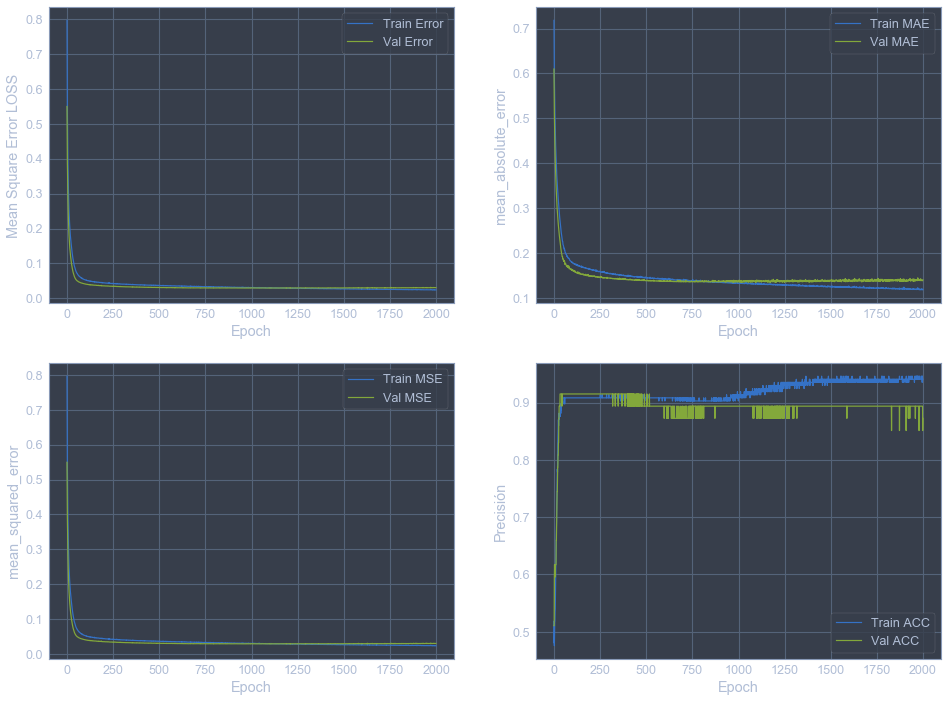

In [15]:
plot_history(history)

Ahora es momento de predecir ya que la red neuronal se encuentra entrenada

In [16]:
y_predic= model.predict(X_test)

Es posible calcular la diferencia entre la prediccion y los datos tomados desde la serie de tiempo

In [17]:
r = y_test - y_predic
ab = abs(r)

Ahora se puede revizar unos datos interesantes

In [18]:
print('Media:', r.mean())
print('Maximo:', ab.max())
print('Minimo:', ab.min())
print('STD:', r.std())

Media: -0.016690753098768166
Maximo: 0.6486800581424126
Minimo: 0.002267700224935082
STD: 0.17139089859053797


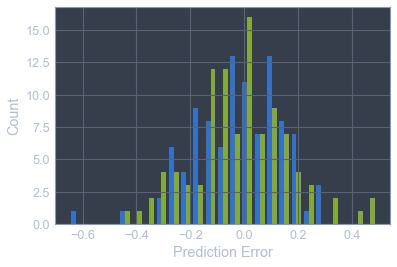

In [19]:
plt.hist(r, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

<h3>Guardar el modelo entrenado </h3>

In [20]:
#model.save('modelo_serie_electrica3.h5')